In [29]:
import pandas as pd

In [30]:
import matplotlib.pyplot as plt

In [31]:
import seaborn as sns

In [32]:
df=pd.read_csv("C:\\Users\\saran\\Downloads\\seattle-weather.csv")

In [33]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


<Axes: xlabel='precipitation', ylabel='Count'>

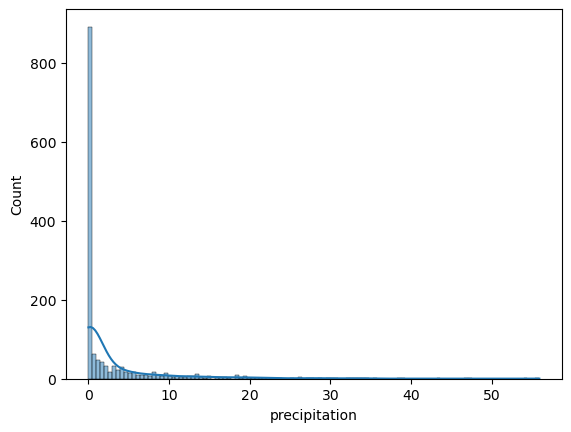

In [34]:
sns.histplot(df['precipitation'], kde=True)

In [35]:
df['precipitation'].describe()


count    1461.000000
mean        3.029432
std         6.680194
min         0.000000
25%         0.000000
50%         0.000000
75%         2.800000
max        55.900000
Name: precipitation, dtype: float64

In [36]:
for col in ['temp_max','temp_min','wind']:
    df[f'{col}_d'] = pd.qcut(df[col], q=2, labels=['low', 'high'])


In [37]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,temp_max_d,temp_min_d,wind_d
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,low,low,high
1,2012-01-02,10.9,10.6,2.8,4.5,rain,low,low,high
2,2012-01-03,0.8,11.7,7.2,2.3,rain,low,low,low
3,2012-01-04,20.3,12.2,5.6,4.7,rain,low,low,high
4,2012-01-05,1.3,8.9,2.8,6.1,rain,low,low,high


In [38]:
df.describe()


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [39]:
def precipitation_discretizer(value):
    if value<=2.80:
        return 'low'
    elif value>2.80 and value<=6.80:
        return 'medium'
    else:
        return 'high'

In [40]:
df['precipitation_d']=df['precipitation'].apply(precipitation_discretizer)

In [41]:
X=df[['weather','temp_max_d',	'temp_min_d',	'wind_d',	'precipitation_d']]

In [42]:
X.head()

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d
0,drizzle,low,low,high,low
1,rain,low,low,high,high
2,rain,low,low,low,low
3,rain,low,low,high,high
4,rain,low,low,high,low


In [43]:
X['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [44]:
X.dtypes

weather              object
temp_max_d         category
temp_min_d         category
wind_d             category
precipitation_d      object
dtype: object

In [45]:
X = X.astype(str)

In [46]:
X.dtypes

weather            object
temp_max_d         object
temp_min_d         object
wind_d             object
precipitation_d    object
dtype: object

In [47]:
X['concat_col_w_prep_wind_temp']="wthr_"+X['weather']+'_'+"p_"+ X['precipitation_d']+'_'+"wind_"+ X['wind_d']+'_'+"temp_"+ X['temp_max_d']

In [48]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col_w_prep_wind_temp
0,drizzle,low,low,high,low,wthr_drizzle_p_low_wind_high_temp_low
1,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low
2,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low
3,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low
4,rain,low,low,high,low,wthr_rain_p_low_wind_high_temp_low
...,...,...,...,...,...,...
1456,rain,low,low,low,high,wthr_rain_p_high_wind_low_temp_low
1457,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low
1458,fog,low,low,low,low,wthr_fog_p_low_wind_low_temp_low
1459,sun,low,low,high,low,wthr_sun_p_low_wind_high_temp_low


In [49]:
!pip install hmmlearn

In [50]:
from hmmlearn.hmm import CategoricalHMM

In [102]:
model = CategoricalHMM(n_components=3,n_iter=10)

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

In [54]:
le.fit(X['concat_col_w_prep_wind_temp'].to_list())

LabelEncoder()

In [55]:
#le.transform(['drizzle_low_veryhigh_medium'])

In [56]:
def label_encoder_output(element):
    return le.transform([element])[0]

In [57]:
#label_encoder_output('drizzle_low_veryhigh_medium')

In [58]:
X['concat_col_label_encoded']=X['concat_col_w_prep_wind_temp'].apply(label_encoder_output)

In [59]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col_w_prep_wind_temp,concat_col_label_encoded
0,drizzle,low,low,high,low,wthr_drizzle_p_low_wind_high_temp_low,1
1,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low,9
2,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low,15
3,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low,9
4,rain,low,low,high,low,wthr_rain_p_low_wind_high_temp_low,13
...,...,...,...,...,...,...,...
1456,rain,low,low,low,high,wthr_rain_p_high_wind_low_temp_low,11
1457,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low,15
1458,fog,low,low,low,low,wthr_fog_p_low_wind_low_temp_low,7
1459,sun,low,low,high,low,wthr_sun_p_low_wind_high_temp_low,27


In [60]:
X[['concat_col_w_prep_wind_temp','concat_col_label_encoded']].head()

,concat_col_w_prep_wind_temp,concat_col_label_encoded
0,wthr_drizzle_p_low_wind_high_temp_low,1
1,wthr_rain_p_high_wind_high_temp_low,9
2,wthr_rain_p_low_wind_low_temp_low,15
3,wthr_rain_p_high_wind_high_temp_low,9
4,wthr_rain_p_low_wind_high_temp_low,13


In [61]:
sequence_of_labels=X['concat_col_label_encoded'].to_list()

# HOME WORK 1 UNDERSTAND HMM , fit, decode, high level overview of the algorithms, you will come across algos like viterbi, balm welch, research these say from youtube, wiki, or any other source 

In [62]:
model.fit([sequence_of_labels])

CategoricalHMM(n_components=3, n_features=np.int64(30),
               random_state=RandomState(MT19937) at 0x1F35187CE40)

In [63]:
model.decode([sequence_of_labels])

(-4634.934771113041, array([1, 2, 1, ..., 2, 2, 2]))

In [64]:
model.decode([sequence_of_labels])[1][:20]

array([1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2])

In [65]:
X['hidden_state']=model.decode([sequence_of_labels])[1]

In [66]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col_w_prep_wind_temp,concat_col_label_encoded,hidden_state
0,drizzle,low,low,high,low,wthr_drizzle_p_low_wind_high_temp_low,1,1
1,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low,9,2
2,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low,15,1
3,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low,9,2
4,rain,low,low,high,low,wthr_rain_p_low_wind_high_temp_low,13,2
...,...,...,...,...,...,...,...,...
1456,rain,low,low,low,high,wthr_rain_p_high_wind_low_temp_low,11,1
1457,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low,15,2
1458,fog,low,low,low,low,wthr_fog_p_low_wind_low_temp_low,7,2
1459,sun,low,low,high,low,wthr_sun_p_low_wind_high_temp_low,27,2


# HOME WORK 2: INTERPRET THESE HIDDEN STATES (CLASS PROJECT 1)
- use distributions ,plots , any analytics you can think of make sense of these latent hidden states
- i.e. making sense of the model.
- -play with number of hidden states until the model is meaningful

In [67]:
model.transmat_

array([[0.01848259, 0.09125838, 0.89025903],
       [0.12406111, 0.01773583, 0.85820306],
       [0.07171219, 0.25814378, 0.67014403]])

In [68]:
#

In [69]:
model.emissionprob_

array([[1.02274006e-02, 5.19571332e-04, 1.39569668e-02, 2.45580272e-02,
        4.32142562e-02, 3.24005793e-03, 5.04034042e-02, 3.84228037e-03,
        2.97066308e-02, 5.09877099e-02, 5.41893567e-03, 1.16877236e-01,
        3.98035573e-02, 1.24099003e-02, 5.71033144e-02, 1.34596231e-02,
        3.68767942e-02, 9.52816214e-02, 2.91215425e-03, 1.30834674e-02,
        9.12389265e-03, 3.06045407e-04, 1.28001193e-03, 1.64351362e-04,
        3.12457827e-03, 1.56426132e-04, 8.61609099e-02, 5.69358197e-02,
        1.41057544e-01, 7.78075116e-02],
       [8.85828478e-04, 1.31493347e-02, 9.88872489e-03, 6.57973492e-03,
        1.87427622e-02, 4.26927146e-03, 2.25612908e-02, 1.53895096e-02,
        1.30046312e-02, 5.35442488e-02, 2.12684839e-02, 3.81608759e-02,
        2.69557344e-02, 4.75558359e-02, 6.02209789e-02, 1.31057414e-01,
        1.59226518e-02, 6.53600902e-02, 1.27419611e-04, 9.85910235e-04,
        1.12742821e-02, 1.12499319e-03, 3.97220215e-04, 3.28520546e-03,
        6.87998192e-03,

# HOME WORK 3: Model Optimization
- learn aic , bic evalution metrics
-iterate modelling to optimize for evaluation metrics

In [70]:
# Total Categories in categorical columns

In [71]:
X['concat_col_w_prep_wind_temp'].value_counts()

concat_col_w_prep_wind_temp
wthr_sun_p_low_wind_low_temp_high         279
wthr_sun_p_low_wind_high_temp_high        172
wthr_rain_p_high_wind_high_temp_low       130
wthr_sun_p_low_wind_low_temp_low          118
wthr_rain_p_low_wind_low_temp_low          99
wthr_rain_p_low_wind_high_temp_low         97
wthr_sun_p_low_wind_high_temp_low          71
wthr_rain_p_medium_wind_high_temp_low      68
wthr_rain_p_low_wind_low_temp_high         60
wthr_rain_p_medium_wind_low_temp_low       46
wthr_fog_p_low_wind_low_temp_high          43
wthr_rain_p_low_wind_high_temp_high        41
wthr_fog_p_low_wind_low_temp_low           36
wthr_rain_p_high_wind_low_temp_low         31
wthr_rain_p_high_wind_high_temp_high       24
wthr_drizzle_p_low_wind_low_temp_high      22
wthr_drizzle_p_low_wind_low_temp_low       20
wthr_rain_p_high_wind_low_temp_high        16
wthr_rain_p_medium_wind_high_temp_high     16
wthr_rain_p_medium_wind_low_temp_high      13
wthr_fog_p_low_wind_high_temp_high         11
wthr_f

In [72]:
X['concat_col_w_prep_wind_temp'].value_counts().shape

(30,)

In [73]:
model.emissionprob_.shape

(3, 30)

In [74]:
emission_distribution=model.emissionprob_

In [75]:
le.inverse_transform([0])[0]

np.str_('wthr_drizzle_p_low_wind_high_temp_high')

In [76]:
str(le.inverse_transform([0])[0])

'wthr_drizzle_p_low_wind_high_temp_high'

In [77]:
def inverse_label_encoding(val):
    return str(le.inverse_transform([val])[0])

In [78]:
inverse_label_encoding(29)

'wthr_sun_p_low_wind_low_temp_low'

In [79]:
import numpy as np

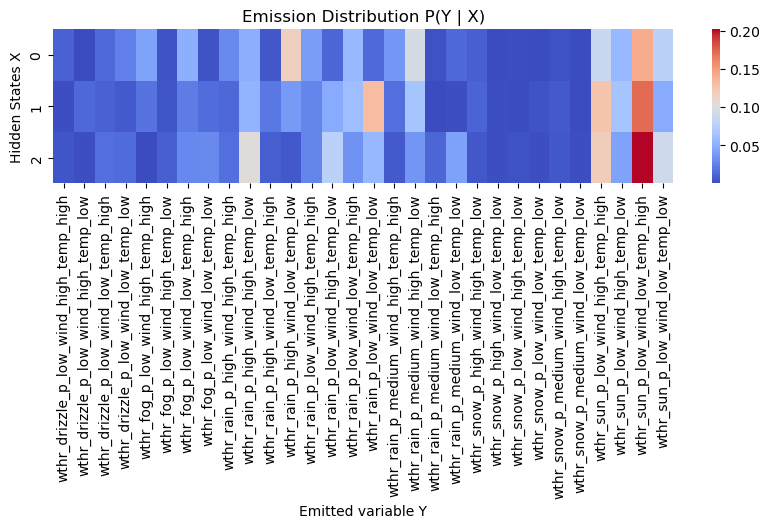

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
ax = sns.heatmap(emission_distribution, cmap='coolwarm', cbar=True)

# Set the title and axis labels
plt.title("Emission Distribution P(Y | X)")
plt.xlabel("Emitted variable Y")
plt.ylabel("Hidden States X")
# Replace y-ticks (encoded 0,1,2) with inverse label names
ax.set_xticks(np.arange(emission_distribution.shape[1]) + 0.5)
ax.set_xticklabels(
    [inverse_label_encoding(i) for i in range(emission_distribution.shape[1])],
    rotation=90
)

plt.show()

In [81]:
[inverse_label_encoding(i) for i in range(30)]

['wthr_drizzle_p_low_wind_high_temp_high',
 'wthr_drizzle_p_low_wind_high_temp_low',
 'wthr_drizzle_p_low_wind_low_temp_high',
 'wthr_drizzle_p_low_wind_low_temp_low',
 'wthr_fog_p_low_wind_high_temp_high',
 'wthr_fog_p_low_wind_high_temp_low',
 'wthr_fog_p_low_wind_low_temp_high',
 'wthr_fog_p_low_wind_low_temp_low',
 'wthr_rain_p_high_wind_high_temp_high',
 'wthr_rain_p_high_wind_high_temp_low',
 'wthr_rain_p_high_wind_low_temp_high',
 'wthr_rain_p_high_wind_low_temp_low',
 'wthr_rain_p_low_wind_high_temp_high',
 'wthr_rain_p_low_wind_high_temp_low',
 'wthr_rain_p_low_wind_low_temp_high',
 'wthr_rain_p_low_wind_low_temp_low',
 'wthr_rain_p_medium_wind_high_temp_high',
 'wthr_rain_p_medium_wind_high_temp_low',
 'wthr_rain_p_medium_wind_low_temp_high',
 'wthr_rain_p_medium_wind_low_temp_low',
 'wthr_snow_p_high_wind_high_temp_low',
 'wthr_snow_p_high_wind_low_temp_low',
 'wthr_snow_p_low_wind_high_temp_low',
 'wthr_snow_p_low_wind_low_temp_low',
 'wthr_snow_p_medium_wind_high_temp_low'

In [82]:
model.transmat_

array([[0.01848259, 0.09125838, 0.89025903],
       [0.12406111, 0.01773583, 0.85820306],
       [0.07171219, 0.25814378, 0.67014403]])

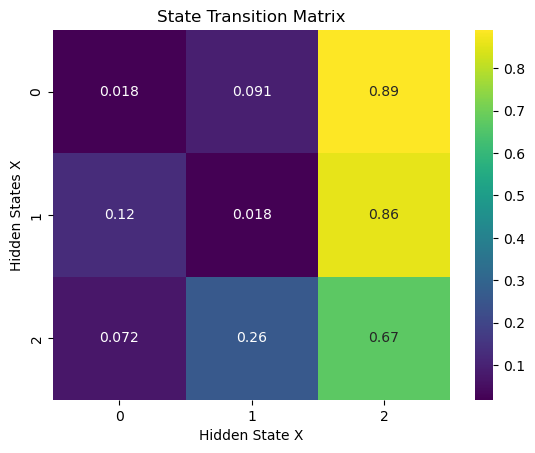

In [83]:
ax2=sns.heatmap(pd.DataFrame(model.transmat_),annot=True,cmap='viridis')
plt.title("State Transition Matrix")
plt.xlabel("Hidden State X")
plt.ylabel("Hidden States X")
plt.show()

In [84]:
model.startprob_

array([2.01595398e-12, 9.99999990e-01, 9.82499394e-09])

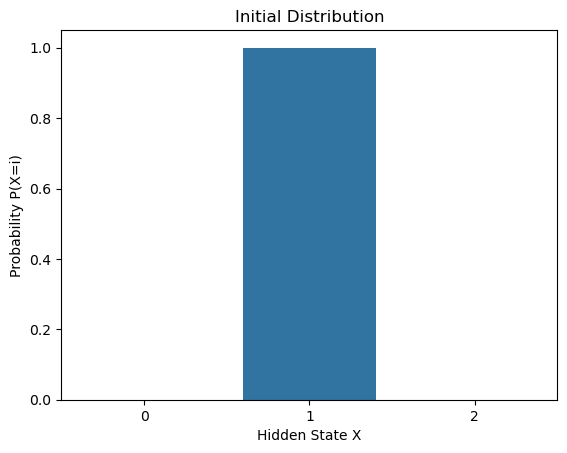

In [85]:
ax3=sns.barplot(data=model.startprob_)
plt.title("Initial Distribution")
plt.xlabel("Hidden State X")
plt.ylabel("Probability P(X=i)")
plt.show()

# Hyperparameter Tuning using Hyperopt

In [89]:
pip install hyperopt

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ ------------------------

In [115]:
from hyperopt import hp, fmin
from hyperopt import Trials
# the search algorithms
from hyperopt import tpe

In [116]:
# determine the hyperparameter space

param_grid = {
    "n_components": hp.choice("n_components", [x for x in range(2,21)]),
    "n_iter": hp.choice("n_iter", [x for x in range(2,200)]),
    "tol": hp.loguniform("tol", np.log(1e-6), np.log(1e-1)),
}

In [117]:
# the objective function takes the hyperparameter space
# as input

def objective(params):

    # we need a dictionary to indicate which value from the space
    # to attribute to each value of the hyperparameter in the xgb
    params_dict = {
        'n_components': params['n_components'],
        'n_iter':params['n_iter'],
        'n_iter':params['n_components']
    }

    # with ** we pass the items in the dictionary as parameters
    # to the xgb
    #mlp = MLPClassifier(**params_dict)
    model = CategoricalHMM(**params_dict)
    model.fit([sequence_of_labels])
    
    # train with cv
    score = float(model.bic([sequence_of_labels]))

    # to minimize, we negate the score
    return score

In [119]:
# fmin performs the minimization
# rand.suggest samples the parameters at random
# i.e., performs the random search
trials = Trials()

search = fmin(
    fn=objective,
    space=param_grid,
    max_evals=500,
    rstate=np.random.default_rng(42),
    algo=tpe.suggest,  # randomized search
    trials=trials
)

100%|███████████████████████████████████████████████| 500/500 [02:46<00:00,  3.01trial/s, best loss: 6154.253326373627]


In [120]:
search

{'n_components': np.int64(18),
 'n_iter': np.int64(119),
 'tol': np.float64(8.61104754786684e-06)}

In [121]:
# the best hyperparameters can also be found in
# trials
trials.argmin


{'n_components': np.int64(18),
 'n_iter': np.int64(119),
 'tol': np.float64(8.61104754786684e-06)}

In [126]:
results = pd.concat([
    pd.DataFrame(trials.vals),
    pd.DataFrame(trials.results)],
    axis=1,
).sort_values(by='loss', ascending=True).reset_index(drop=True)

results.head(10)

,n_components,n_iter,tol,loss,status
0,18,119,0.000009,6154.253326,ok
1,18,183,0.018390,6174.071540,ok
2,18,45,0.052377,6181.160068,ok
3,18,157,0.000118,6194.048861,ok
4,18,113,0.000004,6203.164280,ok
5,18,39,0.041970,6212.760680,ok
6,18,167,0.029550,6219.574512,ok
7,18,110,0.000044,6222.292881,ok
8,18,190,0.038900,6222.660469,ok
9,18,130,0.000001,6225.053216,ok


Text(0.5, 0, 'Hyperparam combination')

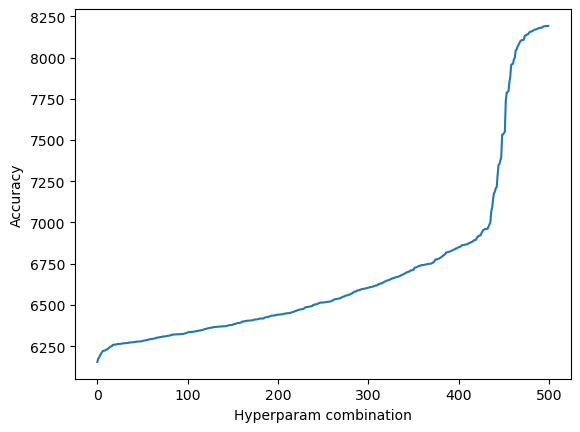

In [127]:
results['loss'].plot()
plt.ylabel('Accuracy')
plt.xlabel('Hyperparam combination')

In [129]:
model = CategoricalHMM(n_components=18,n_iter=119,tol=8.61104754786684e-06)
model.fit([sequence_of_labels])

CategoricalHMM(n_components=18, n_features=np.int64(30), n_iter=119,
               random_state=RandomState(MT19937) at 0x1F35187CE40,
               tol=8.61104754786684e-06)

In [130]:
model.decode([sequence_of_labels])[1][:20]

array([ 5,  6,  5,  6,  5, 15, 16, 10,  6,  5, 15, 16, 15, 16, 10,  6,  5,
        6,  5,  6])

In [131]:
X['hidden_state']=model.decode([sequence_of_labels])[1]

In [132]:
emission_distribution=model.emissionprob_

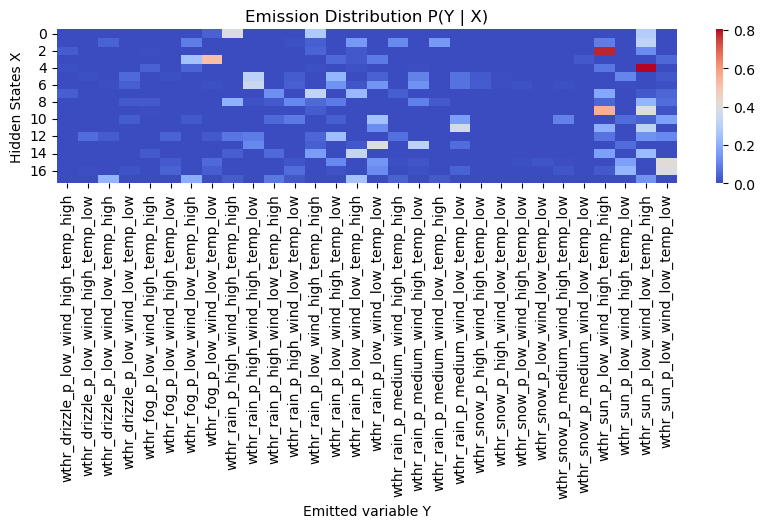

In [133]:

plt.figure(figsize=(10, 2))
ax = sns.heatmap(emission_distribution, cmap='coolwarm', cbar=True)

# Set the title and axis labels
plt.title("Emission Distribution P(Y | X)")
plt.xlabel("Emitted variable Y")
plt.ylabel("Hidden States X")
# Replace y-ticks (encoded 0,1,2) with inverse label names
ax.set_xticks(np.arange(emission_distribution.shape[1]) + 0.5)
ax.set_xticklabels(
    [inverse_label_encoding(i) for i in range(emission_distribution.shape[1])],
    rotation=90
)

plt.show()

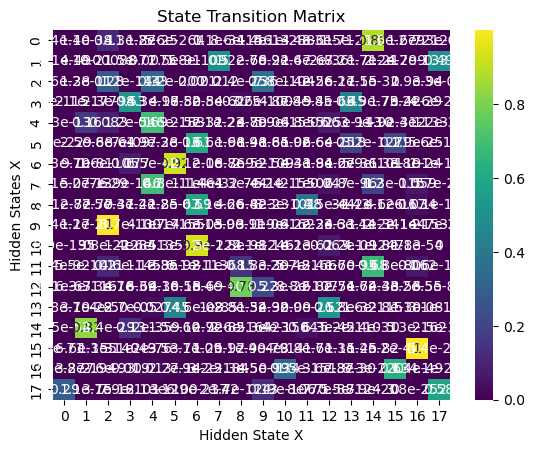

In [134]:
ax2=sns.heatmap(pd.DataFrame(model.transmat_),annot=True,cmap='viridis')
plt.title("State Transition Matrix")
plt.xlabel("Hidden State X")
plt.ylabel("Hidden States X")
plt.show()